# Process GridRad Data for Deep Learning 

Author: Randy Chase 

Here I will show you how to process 1 gridrad file. 

<ins>Steps to preparing data: </ins>
1) Remove ground clutter/non-meteorological echoes. 
2) Classify echoes as Convective or Stratiform. 
3) Identify "Storms"
4) Track Stroms
5) Label Storms (did the storm produce a tornado). 


In [1]:
#dopplerchase(this will be removed when python package is created and installed)
import sys
sys.path.insert(1, '../deeptor/')

In [25]:
from gridrad_tools import gridrad
filename = '../example_data/nexrad_3d_v4_2_20180502T010000Z.nc'

#the gridrad object will open the netcdf
gr = gridrad(filename=filename,filter=True)
#and store it in a data dict. 
list(gr.data.keys())

['name',
 'x',
 'y',
 'z',
 'Z_H',
 'SW',
 'AzShr',
 'Div',
 'Z_DR',
 'K_DP',
 'r_HV',
 'nobs',
 'necho',
 'file',
 'sweeps_merged',
 'Analysis_time',
 'Analysis_time_window',
 'File_creation_date',
 'Grid_scheme',
 'Algorithm_version',
 'Algorithm_description',
 'Authors',
 'Project_sponsor',
 'Project_name']

In [26]:
#if you are familiar with xarray you can convert this data dict. to a dataset 
gr.to_xarray()
gr.ds

<xarray.Dataset>
Dimensions:  (alts: 29, lats: 528, lons: 480)
Coordinates:
  * lons     (lons) float64 257.0 257.0 257.1 257.1 ... 266.9 266.9 267.0 267.0
  * lats     (lats) float64 34.01 34.03 34.05 34.07 ... 44.93 44.95 44.97 44.99
  * alts     (alts) float64 0.5 1.0 1.5 2.0 2.5 3.0 ... 18.0 19.0 20.0 21.0 22.0
Data variables:
    Z_H      (alts, lats, lons) float64 nan nan nan nan nan ... nan nan nan nan
    Z_DR     (alts, lats, lons) float64 nan nan nan nan nan ... nan nan nan nan
    K_DP     (alts, lats, lons) float64 nan nan nan nan nan ... nan nan nan nan
    r_HV     (alts, lats, lons) float64 nan nan nan nan nan ... nan nan nan nan

Populating the interactive namespace from numpy and matplotlib


<ipython-input-27-179e19a03d59>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(gr.ds.lons,gr.ds.lats,gr.ds.Z_H[5,:,:],cmap='Greys')


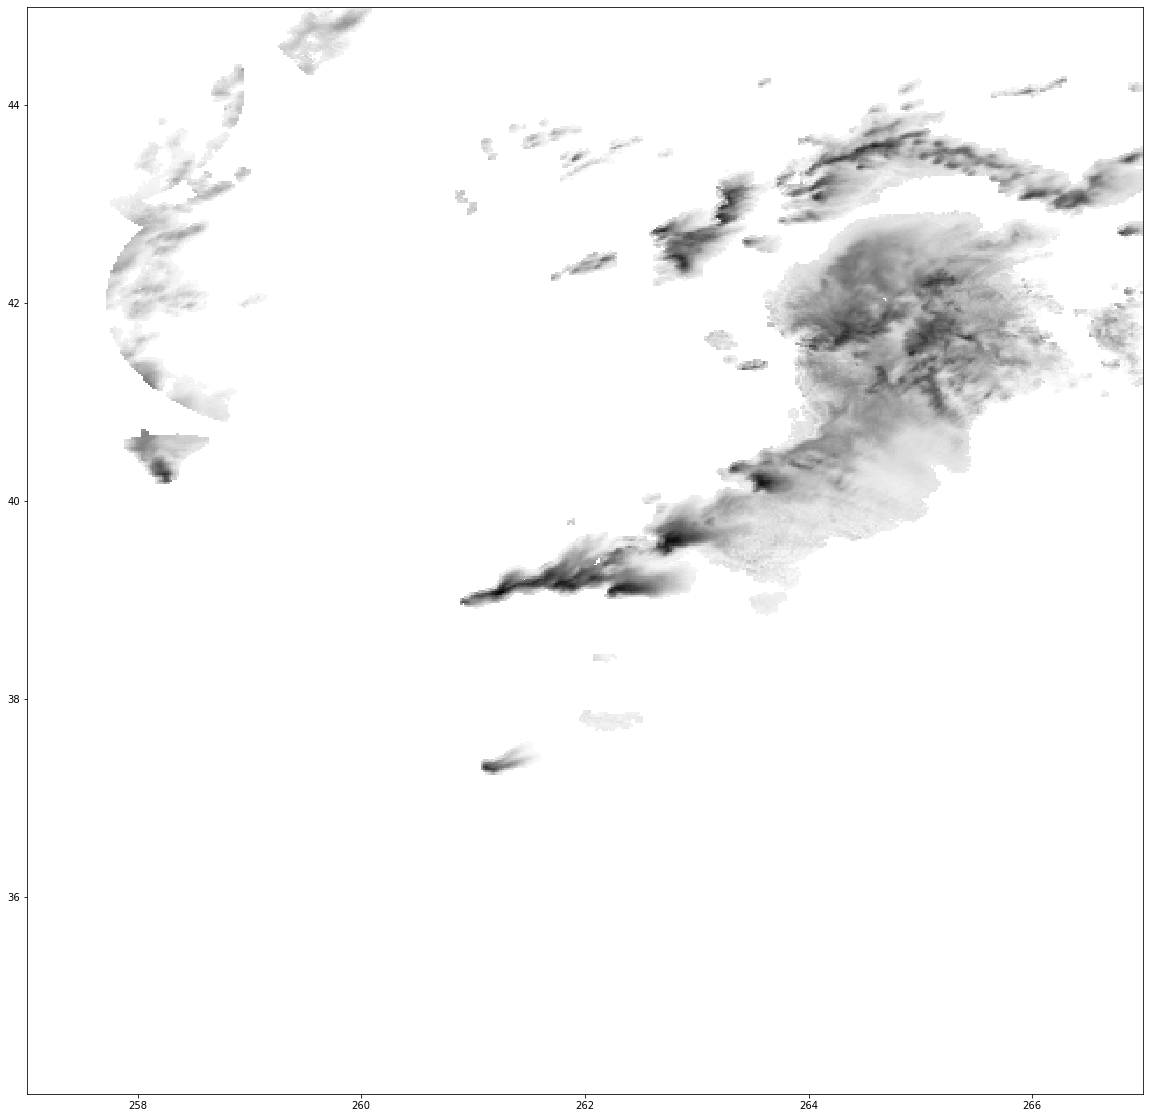

In [27]:
%pylab inline
plt.figure(figsize=(20,20))
plt.pcolormesh(gr.ds.lons,gr.ds.lats,gr.ds.Z_H[5,:,:],cmap='Greys')

<ipython-input-32-a0cbb8276b54>:1: RuntimeWarning: All-NaN axis encountered
  comp_Z = np.nanmax(gr.ds.Z_H,axis=0)
<ipython-input-32-a0cbb8276b54>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(gr.ds.lons,gr.ds.lats,comp_Z,cmap='Greys')


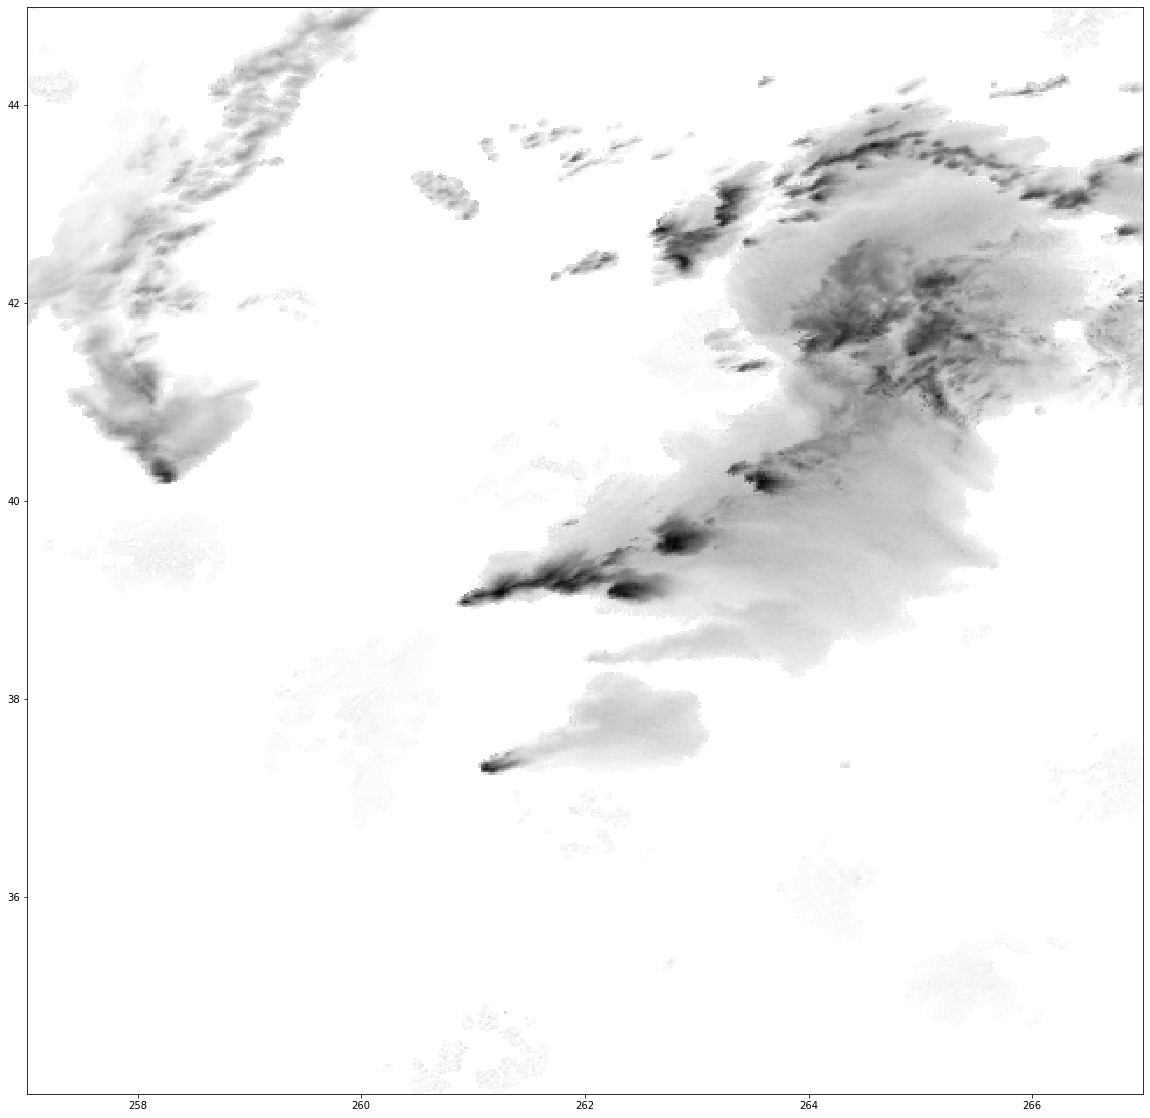

In [32]:
comp_Z = np.nanmax(gr.ds.Z_H,axis=0)
plt.figure(figsize=(20,20))
plt.pcolormesh(gr.ds.lons,gr.ds.lats,comp_Z,cmap='Greys')